# Marek - Day 2 (2017-01-27)
# NumPy-cont'd, TensorFlow basics, Cython

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
mnist.train.labels.shape

(55000,)

In [5]:
mnist.test.labels.shape

(10000,)

In [6]:
mnist.train.images.shape, mnist.test.images.shape

((55000, 784), (10000, 784))

In [7]:
# 784 = 28*28
# mnist.train.images[0,:].reshape(28,28)
# 0 - white
# 1 - black
mnist.train.labels[:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

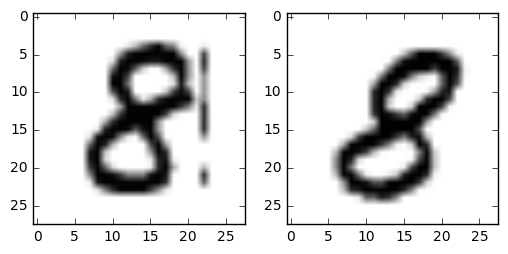

In [7]:
plt.subplot(121)
plt.imshow(1.0-mnist.train.images[9,:].reshape(28,28), cmap="gray")
plt.subplot(122)
plt.imshow(1.0-mnist.train.images[5,:].reshape(28,28), cmap="gray")
plt.show()
# state-of-the-art prediction accuracy == 99.79%

In [8]:
# Exercise: mnist.train.labels, mnist.test.labels -> one-hot-encoding
Y_train = np.zeros((len(mnist.train.labels), 10))
Y_train[np.arange(len(mnist.train.labels)), mnist.train.labels] = 1 
# len(mnist.train.labels) = 55000
print(mnist.train.labels)
Y_test = np.zeros((len(mnist.test.labels), 10))
Y_train[np.arange(len(mnist.test.labels)), mnist.test.labels] = 1

Y_train[:5,]


[7 3 4 ..., 5 6 8]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
# Exercise: For each label (0..9) compute and draw the images' centroids, i.e., the "average" bitmaps

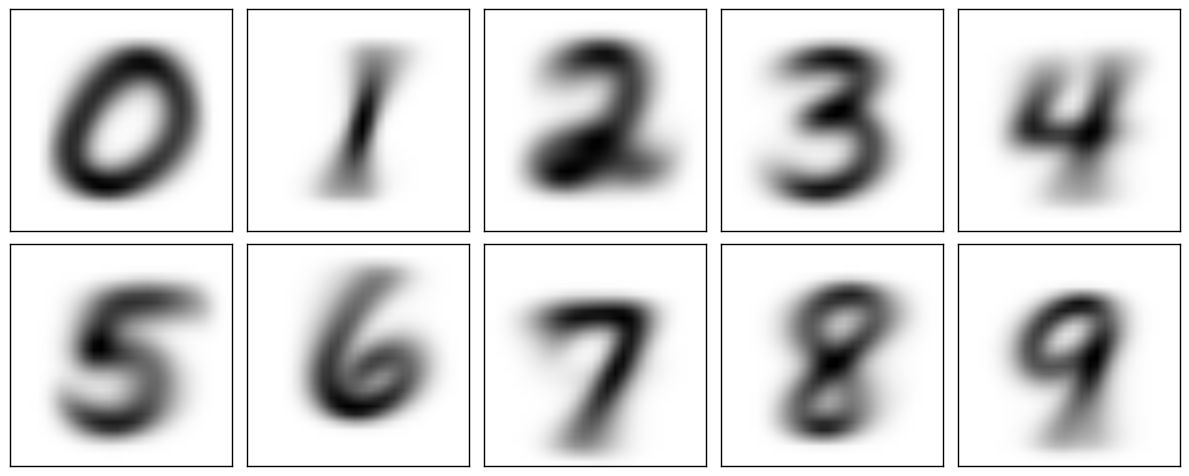

In [10]:
def average_centroid_digit(n):
    return mnist.train.images[mnist.train.labels == n].mean(axis = 0).reshape(28, 28)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(1 - average_centroid_digit(i), cmap='gray')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)
fig.tight_layout()



In [8]:
from scipy.spatial.distance import cdist 
from scipy.stats import mode
# k-nn classifier
def knn(X_train, Y_train, x, k = 3):
    """ Classify single x """
    # X_train - 55000 x 784 matrix
    # Y_train - 55000 corresponding labels
    # 1. Compute the distances between x and each point in X_test (find a function for that in scipy.spatial)
    dist = cdist(X_train, x.reshape(1, -1), metric = 'euclidean')
    # 2. find the k-smallest distances (find the k closest points to x in X_test)
    k_closest = np.argsort(dist, axis = None)[:k]
    # 3. get k corresponding labels in Y_test
    k_labels = Y_train[k_closest]
    # 4. return the mode of the k labels
    return mode(k_labels, axis = None)[0][0]

In [9]:
knn(mnist.train.images, mnist.train.labels, mnist.test.images[9, :])
#plt.imshow(mnist.test.images[1,:].reshape(28, 28))


9

In [10]:
%timeit knn(mnist.train.images, mnist.train.labels, mnist.test.images[3, :]), mnist.test.labels[3]


10 loops, best of 3: 98.8 ms per loop


In [14]:
# Classify all the points in mnist.test.images
# and compute the classifier's accuracy (compare the obtained labels with mnist.test.labels) (Hemming distance...)
# Proportion of correctly guessed labels
# play with different k...

In [53]:
Y_pred = np.array([
        knn(mnist.train.images, mnist.train.labels, mnist.test.images[i, :]) for i in range(len(mnist.test.labels))
    ])

np.mean(Y_pred == mnist.test.labels)    

0.96999999999999997

In [54]:
Y_pred = np.array([
        knn(mnist.train.images, mnist.train.labels, mnist.test.images[i, :], k = 30) for i in range(len(mnist.test.labels))
    ])

np.mean(Y_pred == mnist.test.labels)   

0.95809999999999995

In [55]:
Y_pred = np.array([
        knn(mnist.train.images, mnist.train.labels, mnist.test.images[i, :], k = 20) for i in range(len(mnist.test.labels))
    ])

np.mean(Y_pred == mnist.test.labels)  

0.9617

In [56]:
Y_pred = np.array([
        knn(mnist.train.images, mnist.train.labels, mnist.test.images[i, :], k = 8) for i in range(len(mnist.test.labels))
    ])

np.mean(Y_pred == mnist.test.labels)  

0.96540000000000004

In [1]:
Y_pred = np.array([
        knn(mnist.train.images, mnist.train.labels, mnist.test.images[i, :], k = 1) for i in range(len(mnist.test.labels))
    ])

np.mean(Y_pred == mnist.test.labels)  

NameError: name 'np' is not defined

|k | accuracy|
|--|---------|
|1 |         |
|3 |96.9999  |
|8 |96.54    |
|20|96.17    |
|30|96.54    |

In [57]:
np.mean(Y_pred == mnist.test.labels) # accuracy 

0.96540000000000004

In [29]:
ya = np.r_[1, 2, 3, 4, 5 ,6]
yb = np.r_[1, 2, 4, 4, 5, 6]
print(np.mean(ya == yb), (ya == yb))


0.833333333333 [ True  True False  True  True  True]


## Gradient descent

In [48]:
def f(x, y):
    return np.sin(0.5*x**2-0.25*y**2+3)*np.cos(2*x+1-np.exp(y))    

def f_grad(x, y, h = 0.001):
    return np.r_[
        (f(x+h, y) - f(x, y))/h, 
        (f(x, y+h) - f(x, y))/h,
    ]

def gradient_descent(x0, y0, f, f_grad, c = 0.01, maxiter = 1000):
    xy = np.r_[x0, y0]
    for i in range(maxiter):
        xy -= c*f_grad(xy[0], xy[1])
        plt.plot(xy[0], xy[1], 'ro')
    return xy[0], xy[1]



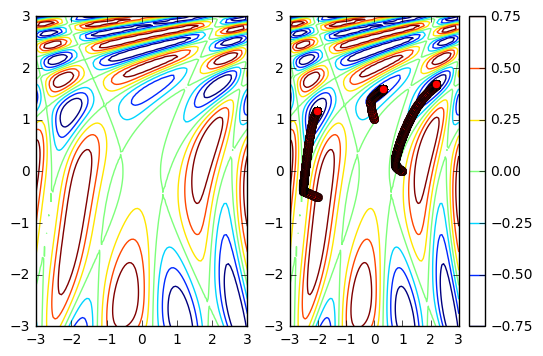

In [49]:
x = y = np.linspace(-3, 3, 101)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.subplot(121)
plt.contour(X, Y, Z, cmap = 'jet')
plt.subplot(122)
CS = plt.contour(X, Y, Z, cmap = 'jet')
plt.colorbar()
plt.show

x1, y1 = gradient_descent(0.0, 1.0, f, f_grad)
x2, y2 = gradient_descent(1.0, 0.0, f, f_grad)
x3, y3 = gradient_descent(-2.0, -0.5, f, f_grad)

Gradient descent works based on the partial derivatives 

$\frac{\partial}{\partial x}$ 

## MNIST  classification based on neural nets (multinomial logistic regression)
___
**
    1. softmax
    2. cross entropy
    3. gradient descent
    4. stochaistic gradient descent
**    
___

In [58]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
X_train = np.insert(mnist.train.images, 784, 1, axis =1) # append a column of ones (bias term)
X_test = np.insert(mnist.test.images, 784, 1, axis = 1)
Y_train = mnist.train.labels
Y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [77]:
def softmax(x):
    """for each row, return normalize(exp(row))"""
    y = np.exp(x)
    return y/np.sum(y, axis =1).reshape(-1, 1)

In [90]:
# in order to classify some x:
# compute 10 linear combinations using some 'learnt weights'
# compute the softmax of the outputs
np.random.seed(123)
W = np.random.normal(size=(785, 10))
# X_train is a 55000 x 785 matrix
# W is 785x10
# X_train * W is a 55000 x 100 matrix

Y_train_pred = softmax(X_train.dot(W))

def accuracy(W, X, Y):
    return np.mean(np.argmax(softmax(X.dot(W)), axis = 1) == np.argmax(Y, axis = 1))


In [91]:
accuracy(W, X_train, Y_train)

0.10461818181818182

In [93]:
def cross_entropy(W, X, Y):
    return -np.sum(np.log(softmax(X.dot(W))) * Y)/X.shape[0]
    

In [94]:
cross_entropy(W, X_train, Y_train)

13.429955033103834

In [96]:
def cross_entropy_grad(W, X, Y):
    return (-X.T.dot(Y - softmax(X.dot(W))))/X.shape[0]

In [108]:
W = np.zeros((785, 10))
maxiter = 250
import time
start = time.time()
for i in range(maxiter):
    ## without gradient descent
    
    if i % 25 == 24:
        print("%3d: %.5f %.5f %.5f" % (i+1, cross_entropy(W, X_train, Y_train),
                                       accuracy(W, X_train, Y_train),
                                       accuracy(W, X_test, Y_test)))
print(time.time()-start)

 25: 2.30259 0.09898 0.09800
 50: 2.30259 0.09898 0.09800
 75: 2.30259 0.09898 0.09800
100: 2.30259 0.09898 0.09800
125: 2.30259 0.09898 0.09800
150: 2.30259 0.09898 0.09800
175: 2.30259 0.09898 0.09800
200: 2.30259 0.09898 0.09800
225: 2.30259 0.09898 0.09800
250: 2.30259 0.09898 0.09800
3.273231029510498


In [105]:
W = np.zeros((785, 10))
k = 0.5
maxiter = 250
start = time.time()
for i in range(maxiter):
    ## gradient descent for the cross entropy
    
    W = W - k * cross_entropy_grad(W, X_train, Y_train)
    
    if i % 25 == 24:
        print("%3d: %.5f %.5f %.5f" % (i+1, cross_entropy(W, X_train, Y_train),
                                       accuracy(W, X_train, Y_train),
                                       accuracy(W, X_test, Y_test)))
print(time.time()-start)

 25: 0.56147 0.86604 0.87660
 50: 0.46117 0.88162 0.88960
 75: 0.41912 0.88913 0.89810
100: 0.39457 0.89429 0.90120
125: 0.37796 0.89747 0.90520
150: 0.36573 0.90025 0.90720
175: 0.35622 0.90225 0.90890
200: 0.34855 0.90384 0.91050
225: 0.34217 0.90524 0.91220
250: 0.33676 0.90669 0.91280
75.4718587398529


In [107]:
W = np.zeros((785, 10))
k = 0.5
maxiter = 250
s = 100
delta_s = X_train.shape[0]//s
start = time.time()
for i in range(maxiter):

    
    ## Stochastic gradient descent
    for j in range(s):
        W=W-k*cross_entropy_grad(W, X_train[(j*delta_s):((j+1)*delta_s),:], Y_train[(j*delta_s):((j+1)*delta_s),:])
    
    if i % 25 == 24:
        print("%3d: %.5f %.5f %.5f" % (i+1, cross_entropy(W, X_train, Y_train),
                                       accuracy(W, X_train, Y_train),
                                       accuracy(W, X_test, Y_test)))
print(time.time()-start)

 25: 0.26668 0.92502 0.92150
 50: 0.25429 0.92916 0.92390
 75: 0.24794 0.93127 0.92420
100: 0.24377 0.93236 0.92520
125: 0.24073 0.93327 0.92560
150: 0.23836 0.93389 0.92530
175: 0.23643 0.93422 0.92520
200: 0.23483 0.93471 0.92500
225: 0.23345 0.93478 0.92490
250: 0.23226 0.93498 0.92480
53.82424974441528


## Do the same steps in Tensorflow
___
**Functions, W, softmax(), accuracy(), cross_entropy(), cross_entropy_grad() are imported from above**
___

In [109]:
import tensorflow as tf

In [115]:
x = tf.placeholder(tf.float32, [None, 785])
y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([785, 10], dtype = tf.float32))

y_pred = tf.nn.softmax(tf.matmul(x, W))

cross_entropy = -tf.reduce_sum(tf.log(y_pred) * y)/tf.cast(tf.shape(x)[0], tf.float32)

accuracy = tf.reduce_mean(tf.cast(
        tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)),
        tf.float32)
                          )

        

In [116]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [119]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
start = time.time()
for i in range(maxiter):
    for j in range(s):
        sess.run(train_step, feed_dict ={
                x: X_train[(j*delta_s):((j+1)*delta_s), :],
                y: Y_train[(j*delta_s):((j+1)* delta_s), :]
            })
    if i % 25 == 24:
        print("%3d: %.5f %.5f %.5f" % (i+1,
                                      sess.run(cross_entropy, feed_dict={
                        x: X_train,
                        y: Y_train
                    }),
                                       sess.run(accuracy, feed_dict={
                        x: X_train,
                        y: Y_train
                    }),
                                       sess.run(accuracy, feed_dict={
                        x: X_test,
                        y: Y_test
                    })
                                      ))
print(time.time()-start)

 25: 0.26668 0.92502 0.92150
 50: 0.25429 0.92916 0.92390
 75: 0.24794 0.93127 0.92420
100: 0.24377 0.93236 0.92520
125: 0.24073 0.93327 0.92560
150: 0.23836 0.93389 0.92530
175: 0.23643 0.93422 0.92520
200: 0.23483 0.93471 0.92500
225: 0.23345 0.93478 0.92490
250: 0.23226 0.93498 0.92480
45.53645968437195


In [120]:
tf.__version__

'0.12.1'

## [Deep MNIST for experts](https://www.tensorflow.org/tutorials/mnist/pros/)

In [121]:
sess = tf.InteractiveSession()

**We start building the computation graph by creating nodes for the input images and target output classes.**

In [122]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

**We now define the weights W and biases b for our model. We could imagine treating these like additional inputs, but TensorFlow has an even better way to handle them: Variable. A Variable is a value that lives in TensorFlow's computation graph. It can be used and even modified by the computation. In machine learning applications, one generally has the model parameters be Variables.**

In [123]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

**Before Variables can be used within a session, they must be initialized using that session. This step takes the initial values (in this case tensors full of zeros) that have already been specified, and assigns them to each Variable. This can be done for all Variables at once:**

In [124]:
sess.run(tf.global_variables_initializer())


**tf.nn.softmax_cross_entropy_with_logits internally applies the softmax on the model's unnormalized model prediction and sums across all classes, and tf.reduce_mean takes the average over these sums.**

In [125]:
y = tf.matmul(x,W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

**Now that we have defined our model and training loss function, it is straightforward to train using TensorFlow. Because TensorFlow knows the entire computation graph, it can use automatic differentiation to find the gradients of the loss with respect to each of the variables. TensorFlow has a variety of built-in optimization algorithms. For this example, we will use steepest gradient descent, with a step length of 0.5, to descend the cross entropy.
**

In [126]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [127]:
for i in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

**We load 100 training examples in each training iteration. We then run the train_step operation, using feed_dict to replace the placeholder tensors x and y_ with the training examples. Note that you can replace any tensor in your computation graph using feed_dict -- it's not restricted to just placeholders.**

In [129]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [130]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9192


**Build a multilayer Convolutional Network**

In [131]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

**Convolution and Pooling**

In [132]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

**First convolutional layer**

In [133]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

**Second convolutional layer**

In [134]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


**Densely Connected layer**

In [135]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

**Dropout** to reduce overfitting

In [136]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

**Readout Layer**

In [138]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

**Train and evaluate the Model**

In [145]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(10)
    if i%1000 == 0:
        train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 1000, training accuracy 1
step 2000, training accuracy 1
step 3000, training accuracy 0.9
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 0.9
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 1


ResourceExhaustedError: OOM when allocating tensor with shape[10000,28,28,32]
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Reshape_3, Variable_5/read)]]
	 [[Node: Mean_12/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_79_Mean_12", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Conv2D', defined at:
  File "/home/ramya/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ramya/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-133-345cb9471d88>", line 6, in <module>
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
  File "<ipython-input-132-88e04dff0660>", line 2, in conv2d
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 396, in conv2d
    data_format=data_format, name=name)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ramya/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,28,28,32]
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Reshape_3, Variable_5/read)]]
	 [[Node: Mean_12/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_79_Mean_12", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


## **Keras**

In [142]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=785))
model.add(Activation("softmax"))


model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=250, batch_size=550, verbose=2)

ImportError: No module named 'keras'